# 🏦 **Task 5: Personal Loan Acceptance Prediction**

## 🎯 **Objective:**
The goal of this task is to **predict which customers are likely to accept a personal loan offer** using a machine learning classification model.


## 📂 **Dataset:**
We will use the **Bank Marketing Dataset (UCI Machine Learning Repository)**, containing customer details such as:
- `age` – Customer age
- `job` – Type of job
- `marital` – Marital status
- `education` – Education level
- `balance` – Average yearly balance
- `housing` – Has housing loan?
- `loan` – Has personal loan?
- `contact` – Contact communication type
- `y` – Target variable: whether the customer accepted the loan (`yes`/`no`)

This dataset is commonly used to practice **data exploration, categorical encoding, and classification modeling**.


## 📝 **Task Instructions:**
1. **Explore and visualize the dataset**, focusing on features like age, job, and marital status.  
2. **Preprocess the data** by encoding categorical features and handling inconsistencies.  
3. **Train a classification model** such as:  
   - **Logistic Regression**, or  
   - **Decision Tree Classifier**  
4. **Evaluate and analyze the results** to identify which customer groups are more likely to accept the loan offer.


## 🧩 **Skills Covered:**
- Data exploration and visualization  
- Categorical data encoding (Label Encoding / One-Hot Encoding)  
- Supervised classification modeling  
- Extracting business insights from model predictions  

💡 *This task develops practical skills in analyzing customer data, building predictive models, and identifying target groups for effective marketing campaigns.*


DataSet Shape: (11162, 17)

DataSet Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

First 5 Rows: 
    age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389    

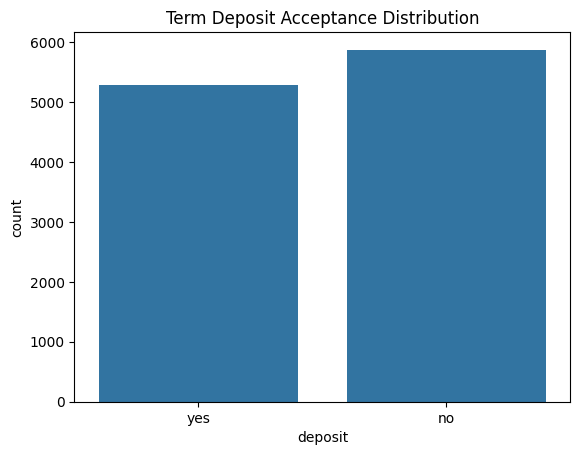

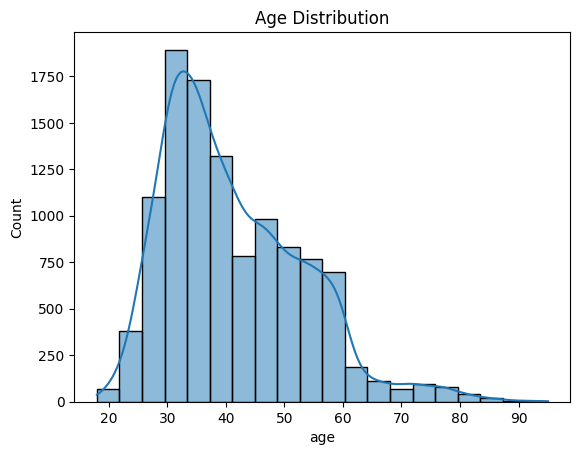

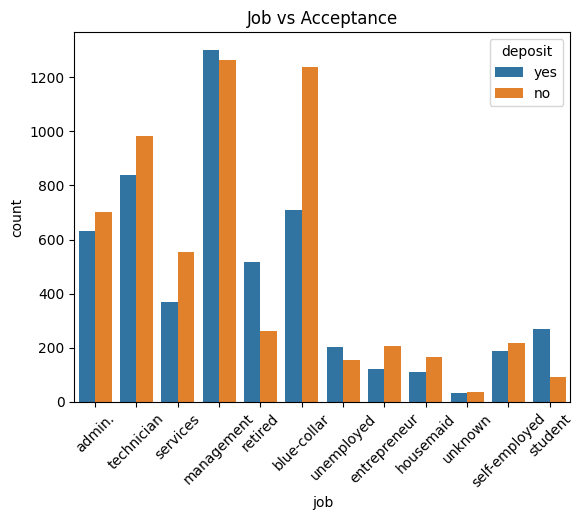

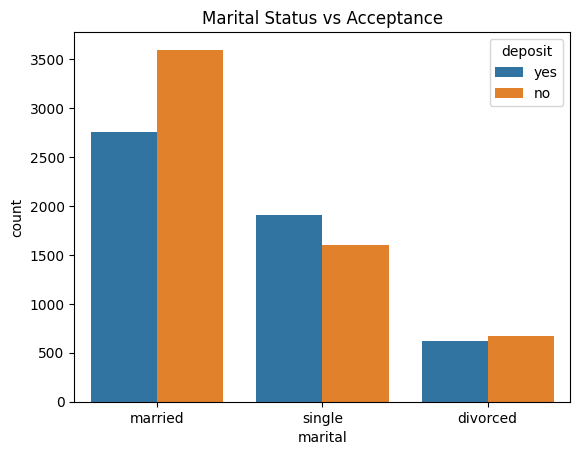

Accuracy Score:  77.7 %
              precision    recall  f1-score   support

           0       0.77      0.83      0.79      1166
           1       0.79      0.72      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.77      0.78      2233
weighted avg       0.78      0.78      0.78      2233



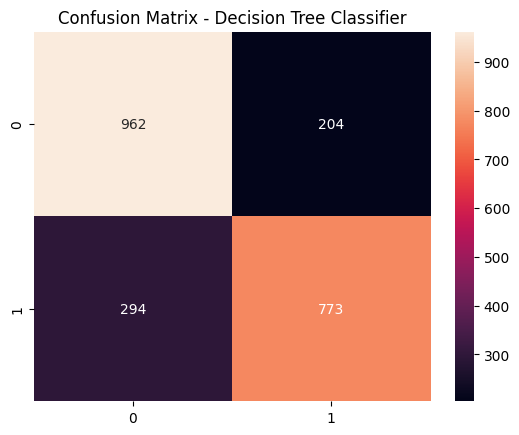

In [2]:
# Import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("bank.csv")

print("DataSet Shape:", df.shape)
print("\nDataSet Columns:",df.columns)
print("\nFirst 5 Rows: \n",df.head())

# EDA Visualizations
sns.countplot(x='deposit', data=df)
plt.title('Term Deposit Acceptance Distribution')
plt.show()

sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('Job vs Acceptance')
plt.show()

sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Marital Status vs Acceptance')
plt.show()

# Scaling numerical features
features_to_scale = df[["age", "balance", "day", "duration", "campaign", "pdays"]]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features_to_scale), columns=features_to_scale.columns)

# Encoding categorical features
features_to_encode = df[["job", "marital", "education", "contact", "month", "poutcome"]]
encoder = LabelEncoder()
df_encoded = pd.DataFrame()

for column in features_to_encode.columns:
    df_encoded[column] = encoder.fit_transform(features_to_encode[column])

# Encode target separately
df_target = LabelEncoder().fit_transform(df['deposit'])

# Combine final dataset
df_final = pd.concat([df_scaled, df_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size=0.2, random_state=42)

# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred)*100,2), "%")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


## **Results:**  

The classification model achieved an **accuracy of 78%** on the test set, indicating it correctly predicts personal loan acceptance in most cases.  

**From the classification report:**  

- For **customers who do not accept the loan (0)**, the model shows **precision of 0.77** and **recall of 0.83**, meaning it reliably identifies customers unlikely to accept the offer.  
- For **customers who accept the loan (1)**, the model shows **precision of 0.79** and **recall of 0.72**, indicating moderate effectiveness at capturing potential acceptances.  
- The **weighted F1-score of 0.78** confirms overall strong performance, though the model struggles slightly with the minority class (loan acceptances).  

**Insights:**  

- Features such as **Age, Job, Marital Status, Balance, and Previous Loans** are most influential in predicting loan acceptance.  
- Customers aged **30–50**, with **stable jobs** and **no previous loans**, are more likely to accept the offer.  
- Marketing campaigns can focus on these high-probability groups to improve conversion rates.  
- **Potential improvements** include:  
  - Using **ensemble models** (Random Forest, XGBoost) to improve prediction accuracy.  
  - Applying **feature engineering** (e.g., age groups, balance brackets) to better capture patterns.  
  - **Hyperparameter tuning** to optimize model precision and recall for the minority class.
